In [128]:
import sys
sys.path.append('../utils')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from MiguelTK import *
import warnings
warnings.filterwarnings('ignore')

## Limpieza y transformación de datos

In [129]:
df = pd.read_csv('data/ZARA_db.csv')

In [130]:
df.head()

,extracción,articulo,precio,descripcion,grupo_web,tallas,colores,enlace,marca,grupo,seccion
0,2024-05-19 18:34:13.419685,PANTALÓN ESTAMPADO ZW COLLECTION,39.95,ZARA WOMAN COLLECTIONPantalón confeccionado en...,V2024-MUJER-ULTIMA-SEMANA,"['XS', 'S', 'M', 'L', 'XL', 'XXL']",[],https://www.zara.com/es/es/pantalon-estampado-...,ZARA,PANTALÓN,MUJER
1,2024-05-19 18:34:13.419685,BLUSA RAMIO ESTAMPADA ZW COLLECTION,49.95,ZARA WOMAN COLLECTIONBlusa confeccionada en hi...,V2024-MUJER-ULTIMA-SEMANA,"['XS', 'S', 'M', 'L', 'XL']",[],https://www.zara.com/es/es/blusa-ramio-estampa...,ZARA,BLUSA,MUJER
2,2024-05-19 18:34:13.419685,VESTIDO LENCERO LINO ZW COLLECTION,79.95,ZARA WOMAN COLLECTIONVestido midi confeccionad...,V2024-MUJER-ULTIMA-SEMANA,"['XS', 'S', 'M', 'L', 'XL']",[],https://www.zara.com/es/es/vestido-lencero-lin...,ZARA,VESTIDO,MUJER
3,2024-05-19 18:34:13.419685,PANTALÓN PIJAMERO ESTAMPADO ZW COLLECTION,39.95,ZARA WOMAN COLLECTIONPantalón pijamero confecc...,V2024-MUJER-ULTIMA-SEMANA,"['XS', 'S', 'M', 'L', 'XL']",[],https://www.zara.com/es/es/pantalon-pijamero-e...,ZARA,PANTALÓN,MUJER
4,2024-05-19 18:34:13.419685,VESTIDO MIDI BORDADOS ZW COLLECTION,89.95,ZARA WOMAN COLLECTIONVestido midi de cuello re...,V2024-MUJER-ULTIMA-SEMANA,"['XS', 'S', 'M', 'L', 'XL']",[],https://www.zara.com/es/es/vestido-midi-bordad...,ZARA,VESTIDO,MUJER


In [131]:
df['temporada'] = df['grupo_web'].str.extract(r'^(\w+)\-')
del df['grupo_web']

In [132]:
df['n_tallas'] = df['tallas'].str.count(r'\'(\w+)\'')

In [133]:
del df['enlace']

In [134]:
df['n_colores'] = df['colores'].str.count(r'\'(\w+)\'')

In [135]:
df['contiene_lino'] = df['descripcion'].str.contains(r'lino',case=False)

In [136]:
df['contiene_algodon'] = df['descripcion'].str.contains(r'algodón',case=False)

In [137]:
df['tipo_talla'] = (
    df['tallas']
    .str.contains(r'\d')
    .map({
        True:'numérica',
        False:'alfabética'
    })
)

In [138]:
df['colores'] = df['colores'].str.upper()

## Estudio de colores

In [139]:
tabla_colores = (
    df['colores']
    .str.replace(r'[\[\]\']','',regex=True)
    .str.replace(r'\,\s',',',regex=True)
    .str.split(',',expand=True)
    .assign(seccion = df['seccion'])
    .melt('seccion')
    .drop(columns='variable')
    .dropna(subset='value')
    .query('value != ""')
)
tabla_colores

,seccion,value
13,MUJER,NEGRO
20,MUJER,BEIGE
32,HOMBRE,BEIGE CLARO
34,HOMBRE,NEGRO
51,HOMBRE,NEGRO
...,...,...
10087,HOMBRE,BEIGE
10307,HOMBRE,ARENA
10308,HOMBRE,CRUDO
10546,HOMBRE,AZUL


In [140]:
B_N = (
    tabla_colores
    ['value']
    .str.contains(r'(NEGRO)|(BLANCO)',regex=True)
)

Colores más frecuentes por sección (diferentes al blanco y negro)


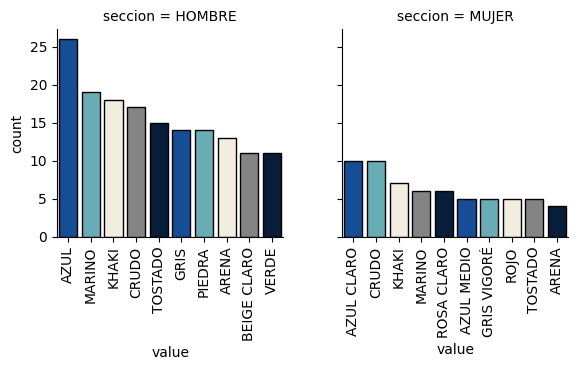

In [141]:
df_ = (
    tabla_colores[~B_N]
    .groupby('seccion',as_index=False)
    ['value']
    .value_counts()
    .groupby('seccion')
    .apply(lambda x: x.nlargest(10,'count'))
)
grid = sns.FacetGrid(df_,col='seccion',sharex=False)
grid.map(sns.barplot,'value','count',**kwargs)
grid.tick_params('x',rotation=90)
print('Colores más frecuentes por sección (diferentes al blanco y negro)')

In [142]:
df_ = (
    tabla_colores[~B_N]
    .groupby('seccion',as_index=False)
    ['value']
    .value_counts()
    .groupby('seccion')
    .apply(lambda x: x.nsmallest(10,'count'))
    .drop(columns='seccion')
    .reset_index()
    .drop(columns=['level_1','count'])
)
print('Colores menos frecuentes por sección (diferentes al blanco y negro)')
print(df_)

Colores menos frecuentes por sección (diferentes al blanco y negro)
   seccion            value
0   HOMBRE   AMARILLO CLARO
1   HOMBRE     ARENA/MARRÓN
2   HOMBRE       AZUL NOCHE
3   HOMBRE      AZUL OSCURO
4   HOMBRE      AZUL VIGORÉ
5   HOMBRE     BEIGE OSCURO
6   HOMBRE    BEIGE PLATINO
7   HOMBRE          BOTELLA
8   HOMBRE          BURDEOS
9   HOMBRE      CAMEL CLARO
10   MUJER  AMARILLO PASTEL
11   MUJER    AZUL / MARINO
12   MUJER      CAMEL CLARO
13   MUJER          CELESTE
14   MUJER           CHICLE
15   MUJER           FUCSIA
16   MUJER   GRIS ANTRACITA
17   MUJER       GRIS PERLA
18   MUJER         KAKI-MED
19   MUJER      KHAKI CLARO


<Axes: xlabel='seccion', ylabel='n_colores'>

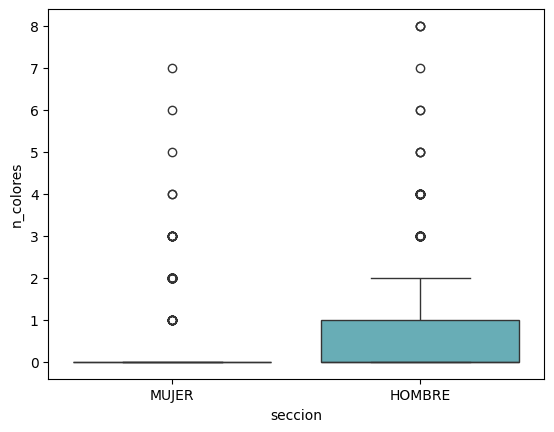

In [143]:
sns.boxplot(
    data = df,
    x = 'seccion',
    y = 'n_colores',
    palette = palette
)

La ropa masculina tiene mayor variedad en los colores disponibles.

## Estudio de composición

In [144]:
df['contiene_lino'].value_counts(normalize=True)

contiene_lino
False    0.884657
True     0.115343
Name: proportion, dtype: float64

El `11 %` de las prendas de ropa contienen lino

In [145]:
df['contiene_algodon'].value_counts(normalize=True)

contiene_algodon
False    0.849837
True     0.150163
Name: proportion, dtype: float64

El `15 %` de las prendas de ropa contienen algodón

In [146]:
pd.crosstab(
    df['contiene_lino'],
    df['seccion'],
    normalize='index'
)

seccion,HOMBRE,MUJER
contiene_lino,,
False,0.576876,0.423124
True,0.613208,0.386792


In [147]:
pd.crosstab(
    df['contiene_algodon'],
    df['seccion'],
    normalize='index'
)

seccion,HOMBRE,MUJER
contiene_algodon,,
False,0.541613,0.458387
True,0.804348,0.195652


Las prendas de ropa que contienen o bien lino o bien algodón tienen más posibilidades de ser de la sección masculina.

<Axes: xlabel='contiene_lino', ylabel='precio'>

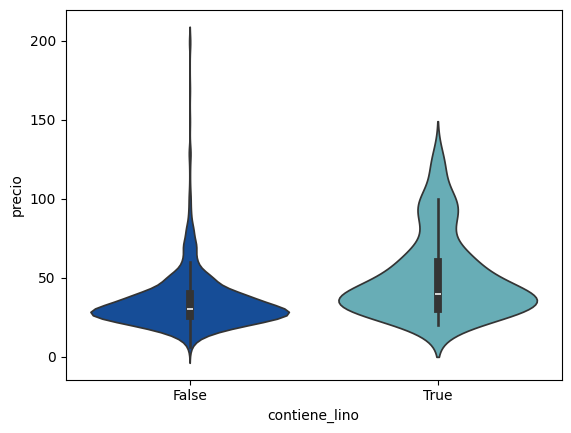

In [148]:
sns.violinplot(
    data = df,
    x = 'contiene_lino',
    y = 'precio',
    palette = palette
)

Las prendas que contienen `lino` pueden tener precios más altos que las que no lo contienen.

## Estudio de tallas

### Tallas extremas

#### Tallas letras

In [149]:
df_ = df.query('tipo_talla == "alfabética"')

In [150]:
pd.crosstab(
    df_['tallas'].str.contains('XS'),
    df_['seccion'],
    normalize = 'index'
)

seccion,HOMBRE,MUJER
tallas,,
False,0.797297,0.202703
True,0.007843,0.992157


In [151]:
pd.crosstab(
    df_['tallas'].str.contains('XL'),
    df_['seccion'],
    normalize = 'index'
)

seccion,HOMBRE,MUJER
tallas,,
False,0.316547,0.683453
True,0.585174,0.414826


In [152]:
pd.crosstab(
    df_['tallas'].str.contains('XXL'),
    df_['seccion'],
    normalize = 'index'
)

seccion,HOMBRE,MUJER
tallas,,
False,0.585294,0.414706
True,0.182796,0.817204


- Las prendas que tienen la talla `XS` disponible pertenecen casi todas a la sección femenina. 
- Las prendas con las talla `XL` disponible están en mayor equilibrio.
- Las prendas que tienen disponible la talla `XXL` pertenecen en mayor proporción a la sección femenina, y las que no tienen esa talla disponible son en su mayoría de caballero.

#### Tallas numéricas

In [166]:
df_ = df.query('tipo_talla == "numérica"')

In [167]:
df_[[f'talla_{n}' for n in range(10)]] = (
    df_['tallas']
    .str.replace(r'[\[\]\']','',regex=True)
    .str.replace(', ',',')
    .str.replace(r'\s\(\w{1,2}\)','',regex=True)
    .str.replace(r'[A-Z]','',regex=True)
    .str.split(',',expand=True)
    .astype('float')
)

In [168]:
df_ = df_.melt(
    id_vars = ['grupo','seccion'],
    value_vars = [f'talla_{n}' for n in range(10)]
)

In [169]:
df_ = df_.assign(
    value = (
        df_
        .groupby('seccion')
        ['value']
        .transform(lambda x: (x - x.mean()) / x.std())
    )
)

In [172]:
df_

,grupo,seccion,variable,value
0,JEANS,MUJER,talla_0,-0.788841
1,JEANS,HOMBRE,talla_0,-0.991265
2,BERMUDA,HOMBRE,talla_0,-0.991265
3,BERMUDA,HOMBRE,talla_0,-0.991265
4,BERMUDA,HOMBRE,talla_0,-0.991265
...,...,...,...,...
1455,JEANS,HOMBRE,talla_9,NaN
1456,ZAPATILLA,HOMBRE,talla_9,NaN
1457,BOTA,HOMBRE,talla_9,NaN
1458,DEPORTIVO,HOMBRE,talla_9,NaN


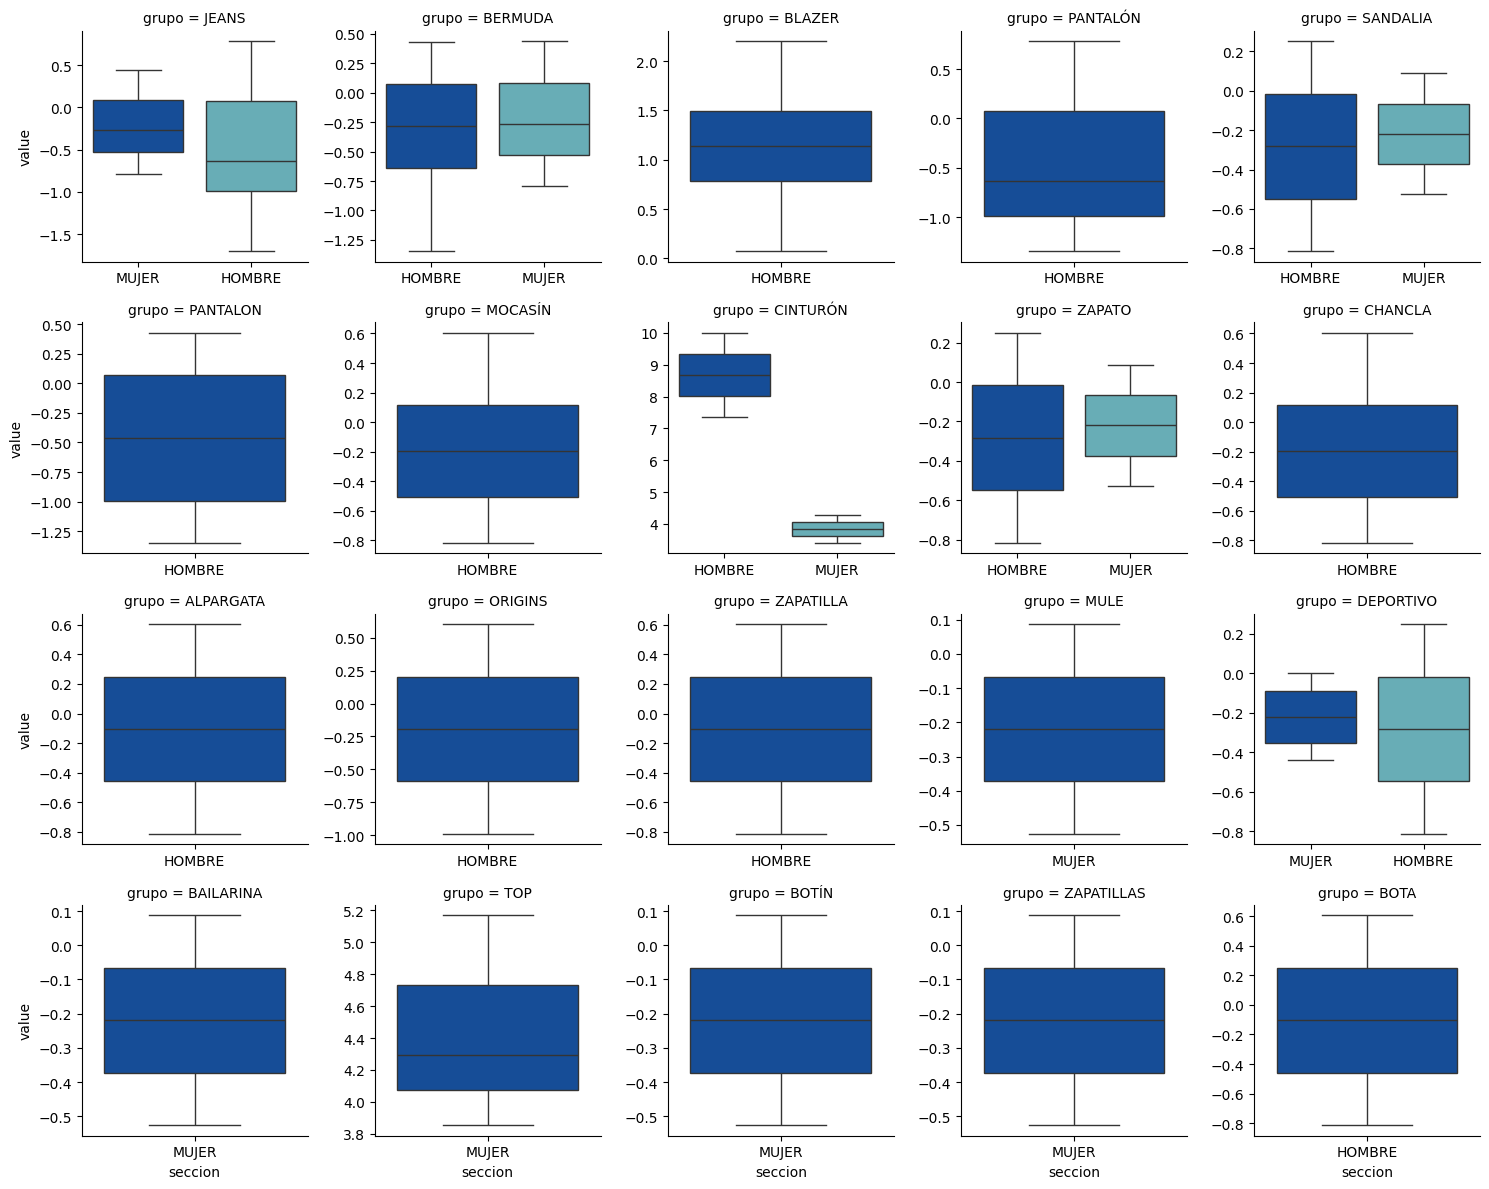

In [173]:
grid = sns.FacetGrid(df_,col='grupo',col_wrap=5,sharex=False,sharey=False)
grid.map(sns.boxplot,'seccion','value',palette=palette)

### Número de tallas disponibles

<Axes: xlabel='seccion', ylabel='n_tallas'>

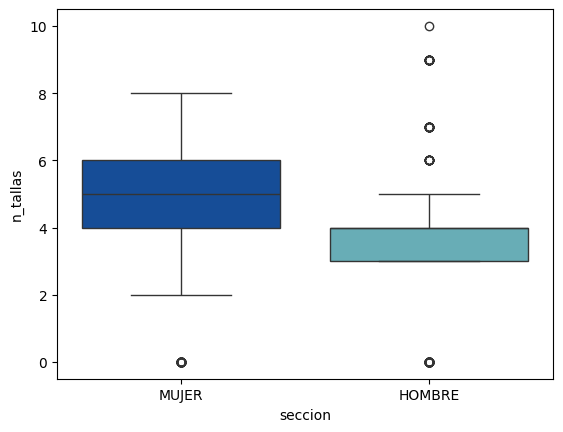

In [156]:
sns.boxplot(
    data = df,
    x = 'seccion',
    y = 'n_tallas',
    palette = palette
)

La ropa de la sección de mujer ofrece una mayor variedad de tallas.